In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [12]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [13]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# Rename columns
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# Create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [19]:
# Split the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [20]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [26]:
# Word to index mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print ('Found %d unique tokens' %V)

Found 7242 unique tokens


In [27]:
# Pad sequences to get NxT matrix
data_train = pad_sequences(sequences_train)
print ('Shape of data train tensor:', data_train.shape)

T = data_train.shape[1]

Shape of data train tensor: (3733, 162)


In [28]:
data_test = pad_sequences(sequences_test, maxlen = T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 162)


In [32]:
# Create the model

D = 20

# Note: We actually want the size of the embedding as (V + 1) * D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V, then it should have the size V + 1

i = Input(shape = (T,))
x = Embedding (V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [35]:
# Compile and fit
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Training model...')
r = model.fit(data_train, Ytrain, epochs=5, validation_data=(data_test, Ytest))

Training model...
Epoch 1/5
117/117 [==============================] - 5s 23ms/step - loss: 0.3857 - accuracy: 0.8615 - val_loss: 0.2418 - val_accuracy: 0.8760
Epoch 2/5
117/117 [==============================] - 2s 18ms/step - loss: 0.1162 - accuracy: 0.9518 - val_loss: 0.0718 - val_accuracy: 0.9810
Epoch 3/5
117/117 [==============================] - 2s 18ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0828 - val_accuracy: 0.9826
Epoch 4/5
117/117 [==============================] - 2s 19ms/step - loss: 0.0091 - accuracy: 0.9979 - val_loss: 0.0721 - val_accuracy: 0.9831
Epoch 5/5
117/117 [==============================] - 2s 19ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.0808 - val_accuracy: 0.9848


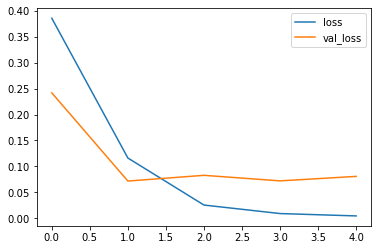

In [36]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

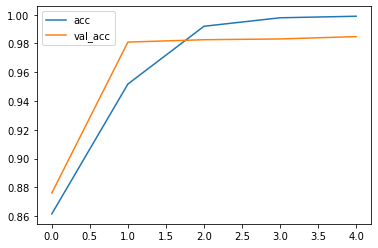

In [37]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();